In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt

2023-11-06 15:09:46.147347: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-06 15:09:46.147376: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-06 15:09:46.147413: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
train_data_dir = '/home/bestlab/Desktop/Squishy-Methane-URAP-New/ChristianaKang/frame_data_movingAvg/train'
test_data_dir = '/home/bestlab/Desktop/Squishy-Methane-URAP-New/ChristianaKang/frame_data_movingAvg/test'

In [3]:
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet.preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet.preprocess_input
)

train_gen = train_datagen.flow_from_directory(
    directory=train_data_dir,
    target_size=(224, 224),
    class_mode='binary',
    batch_size=32
)

test_gen = test_datagen.flow_from_directory(
    directory=test_data_dir,
    target_size=(224, 224),
    class_mode='binary',
    batch_size=32
)

Found 347790 images belonging to 2 classes.
Found 236846 images belonging to 2 classes.


In [5]:
# from sklearn.utils.class_weight import compute_class_weight
# classes = train_gen.classes
# class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(classes), y=classes)
# class_weights = dict(enumerate(class_weights))

In [6]:
# class_weights

{0: 0.5703158309009216, 1: 4.055387126865671}

In [6]:
# class_indices = train_gen.class_indices
# print(class_indices)


{'Leak': 0, 'Nonleaks': 1}


In [7]:
class_weights={0:1, 1:4}

In [8]:
# from tensorflow.keras.callbacks import ModelCheckpoint

In [9]:
from tensorflow.keras.regularizers import l1_l2
base_model = tf.keras.applications.MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu',kernel_regularizer=l1_l2(l1=0.01, l2=0.01))(x)
predictions = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)
# checkpoint_path = "model_checkpoint_C3.h5"

# checkpoint_callback = ModelCheckpoint(
#     filepath=checkpoint_path,
#     monitor='val_loss',  
#     verbose=1,
#     save_best_only=True,  
#     mode='min',  
#     save_weights_only=False  
# )
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])

history=model.fit(train_gen, epochs=5, validation_data=test_gen, class_weight=class_weights)

Epoch 1/5


ResourceExhaustedError: Graph execution error:

Detected at node model/conv1/Conv2D defined at (most recent call last):
  File "/home/bestlab/anaconda3/envs/ck/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/home/bestlab/anaconda3/envs/ck/lib/python3.10/runpy.py", line 86, in _run_code

  File "/home/bestlab/.local/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/home/bestlab/.local/lib/python3.10/site-packages/traitlets/config/application.py", line 1053, in launch_instance

  File "/home/bestlab/.local/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 736, in start

  File "/home/bestlab/.local/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/home/bestlab/anaconda3/envs/ck/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/home/bestlab/anaconda3/envs/ck/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/home/bestlab/anaconda3/envs/ck/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/home/bestlab/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue

  File "/home/bestlab/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 505, in process_one

  File "/home/bestlab/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell

  File "/home/bestlab/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 740, in execute_request

  File "/home/bestlab/.local/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 422, in do_execute

  File "/home/bestlab/.local/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 546, in run_cell

  File "/home/bestlab/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3024, in run_cell

  File "/home/bestlab/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3079, in _run_cell

  File "/home/bestlab/.local/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/bestlab/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3284, in run_cell_async

  File "/home/bestlab/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3466, in run_ast_nodes

  File "/home/bestlab/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code

  File "/tmp/ipykernel_2085540/535333478.py", line 20, in <module>

  File "/home/bestlab/.local/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/bestlab/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1783, in fit

  File "/home/bestlab/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1377, in train_function

  File "/home/bestlab/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1360, in step_function

  File "/home/bestlab/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1349, in run_step

  File "/home/bestlab/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 1126, in train_step

  File "/home/bestlab/.local/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/bestlab/.local/lib/python3.10/site-packages/keras/src/engine/training.py", line 589, in __call__

  File "/home/bestlab/.local/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/bestlab/.local/lib/python3.10/site-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/home/bestlab/.local/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/home/bestlab/.local/lib/python3.10/site-packages/keras/src/engine/functional.py", line 515, in call

  File "/home/bestlab/.local/lib/python3.10/site-packages/keras/src/engine/functional.py", line 672, in _run_internal_graph

  File "/home/bestlab/.local/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/bestlab/.local/lib/python3.10/site-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/home/bestlab/.local/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/home/bestlab/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py", line 290, in call

  File "/home/bestlab/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py", line 262, in convolution_op

OOM when allocating tensor with shape[32,32,112,112] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node model/conv1/Conv2D}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_10312]

In [4]:
model_path = 'mobilenet_model_reg_oldrange.h5'
model.save(model_path)

In [12]:
from tqdm.notebook import tqdm

In [5]:
model = tf.keras.models.load_model(model_path)

In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [7]:
def calculate_metrics_and_plot_confusion_matrix(model, test_gen):
    predictions = model.predict(test_gen, verbose=1)
    binary_predictions = (predictions > 0.5).astype("int32").reshape(-1)
    truth_labels = test_gen.classes
    
    accuracy = accuracy_score(truth_labels, binary_predictions)
    print(f"Test Accuracy: {accuracy:.4f}")
    
    conf_matrix = confusion_matrix(truth_labels, binary_predictions)
    per_class_accuracy = conf_matrix.diagonal() / conf_matrix.sum(axis=1)
    
    for label, acc in zip(test_gen.class_indices.keys(), per_class_accuracy):
        print(f"Class '{label}' Accuracy: {acc:.4f}")
    
    fig, ax = plt.subplots(figsize=(7.5, 7.5))
    ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
    
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title(f'Confusion Matrix (0: Leak, 1: Nonleak)', fontsize=18)
    plt.show()

5424/5424 [==============================] - 129s 23ms/step
Test Accuracy: 0.5437
Class 'Leak' Accuracy: 0.9011
Class 'Nonleaks' Accuracy: 0.1003


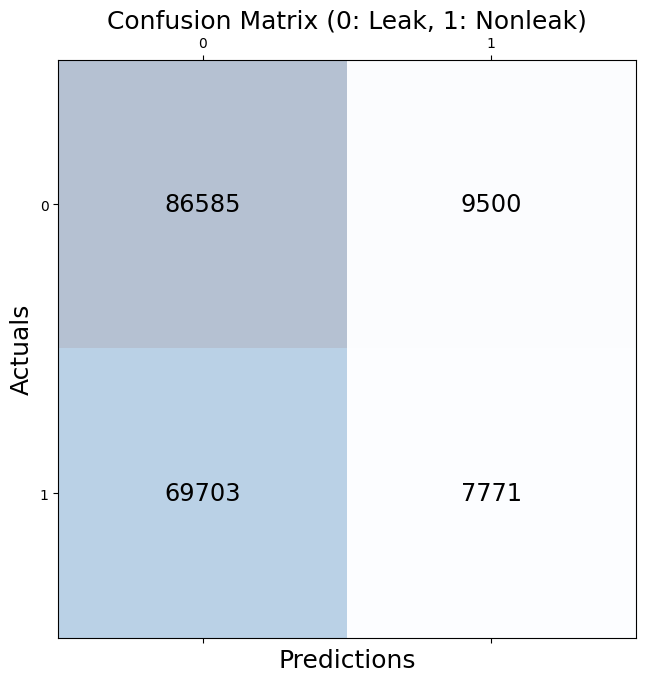

In [8]:
calculate_metrics_and_plot_confusion_matrix(model, test_gen)